In [1]:
import pandas as pd
import sqlite3

## Подключение к базе данных

In [2]:
conn = sqlite3.connect('../data/checking-logs.sqlite', check_same_thread=False)

## Выполнить запрос, который получает дату и время из таблицы просмотров страниц, выбирая только пользователей, а не администраторов

In [3]:
pageviews = pd.read_sql("""
    SELECT uid, datetime
    FROM pageviews
    WHERE uid LIKE 'user_%'
    ORDER BY uid ASC
""", conn, parse_dates=['datetime'])


pageviews.info()
pageviews

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   uid       987 non-null    object        
 1   datetime  987 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 15.6+ KB


,uid,datetime
0,user_1,2020-04-26 21:53:59.624136
1,user_1,2020-04-26 22:06:19.478143
2,user_1,2020-04-26 22:12:09.614497
3,user_1,2020-04-30 19:29:01.831635
4,user_1,2020-05-05 20:26:32.894852
...,...,...
982,user_30,2020-04-29 16:51:21.877630
983,user_30,2020-05-09 20:30:47.034282
984,user_5,2020-05-22 11:30:18.368990
985,user_9,2020-05-21 16:28:28.217529


## Используя Pandas, создайте новый фреймворк, в котором посещения подсчитываются и группируются по дате.

In [4]:
df_view = pageviews.groupby(by=pageviews['datetime'].dt.date).agg({'uid':['count']})
df_view = df_view.reset_index()
df_view.columns = ['date', 'view']
df_view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    33 non-null     object
 1   view    33 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 660.0+ bytes


## Используя метод Pandas .plot(), создайте график

- размер шрифта должен быть 8 
- размер фигуры (15,8) 
- график должен иметь заголовок «Просмотры в день» 
- обратите внимание на вращение крестиков на графике ниже 

<Axes: title={'center': 'Views per day'}, xlabel='date'>

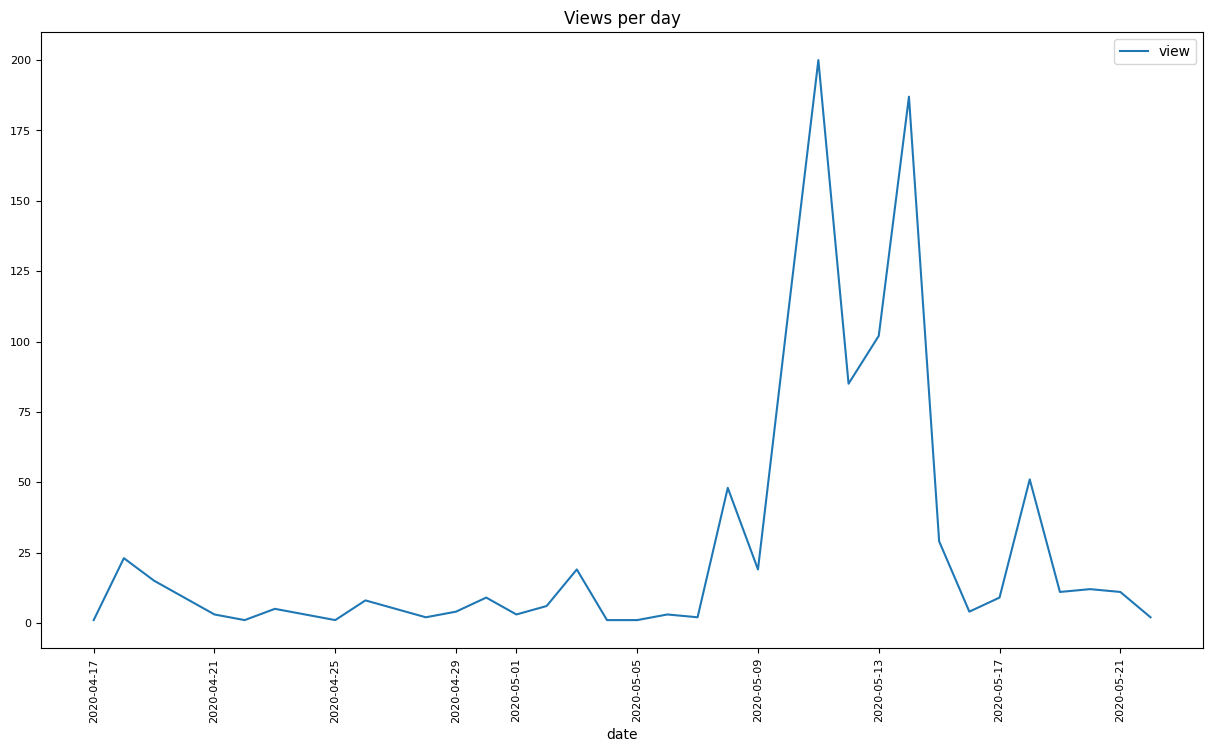

In [5]:
df_view.plot(x='date', y='view', figsize=(15,8), title='Views per day', rot=90, fontsize=8)

## Закрыть соединение с базой данных

In [6]:
conn.close()